# Overview

**A basic ML classification project based on the iris flower dataset**

This is one of the earliest datasets used in the literature on classification methods and widely used in statistics and machine learning. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are not linearly separable from each other.
The data set is compiled by Ronald Fisher, a biologist, in the 1930s.

This dataset is made of 4 features: sepal length, sepal width, petal length, petal width.

This is an exceedingly simple classification project and targetted for beginner level. Most simplest ML algorithms can easily achieve 100% accuracy on this datset.

# Imports

Here we are basically importing all the required libraries and functions.
The libraries we'll be using are:
- Pandas and NumPy
- Matplotlib
- Seaborn
- Scikit-Learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
%matplotlib inline

# Importing Iris Dataset

The iris dataset comes in-built with scikit-learn library, so we don't need to download or gather it from any external source.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

# Exploring Dataset

In [3]:
type(iris)

sklearn.utils._bunch.Bunch

Bunch objects are sometimes used as an output for functions and methods. They extend dictionaries by enabling values to be accessed by key, `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
So we are trying to get all of its keys.

In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


The frame key contains the actual dataset, so we are loading the dataset into the variable `iris_data`.

In [5]:
iris_data = iris.frame

Looking into the dataset.

In [6]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Getting the detailed statistical information about the dataset including individual columns.

In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Getting the `target_names` which are the values our trained model will predict.

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris_data.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

# Pairs of Features

Plot the pairs of features of the Iris dataset using seaborn's `sns.pairplot` function that helps us visualize the relationships between different features of the dataset, with each species color-coded for easy differentiation.

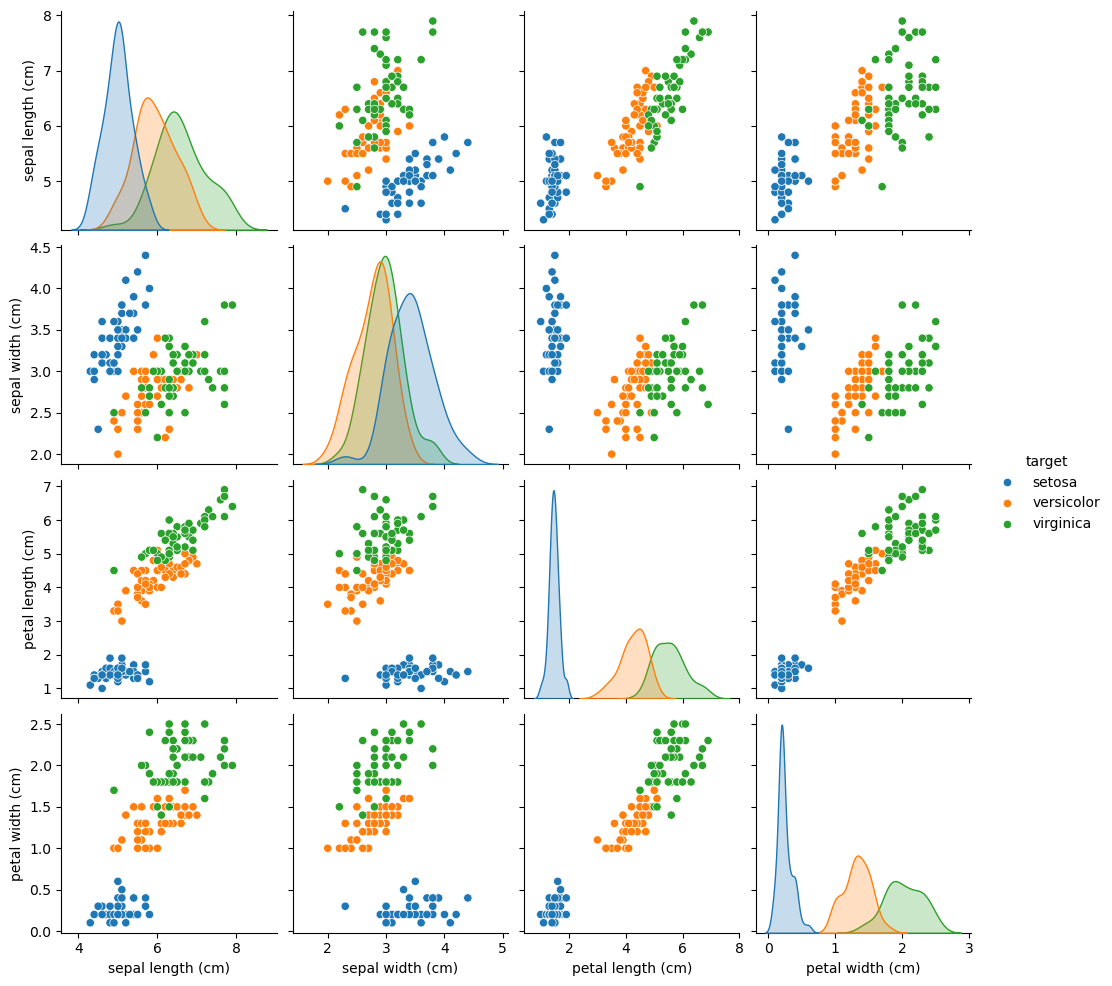

In [11]:
iris.frame["target"] = iris.target_names[iris.target]
_ = sns.pairplot(iris.frame, hue="target")

Each data point on each scatter plot refers to one of the 150 iris flowers in the dataset, with the color indicating their respective type (Setosa, Versicolor, and Virginica).

The diagonal of the plot shows the distribution of each feature. We observe that the petal width and the petal length are the most discriminant features for the three types.

# PCA Representation

Plot a Principal Component Analysis (PCA) to the dataset and then plot the irises across the first three PCA dimensions. This will allow us to better differentiate among the three types.

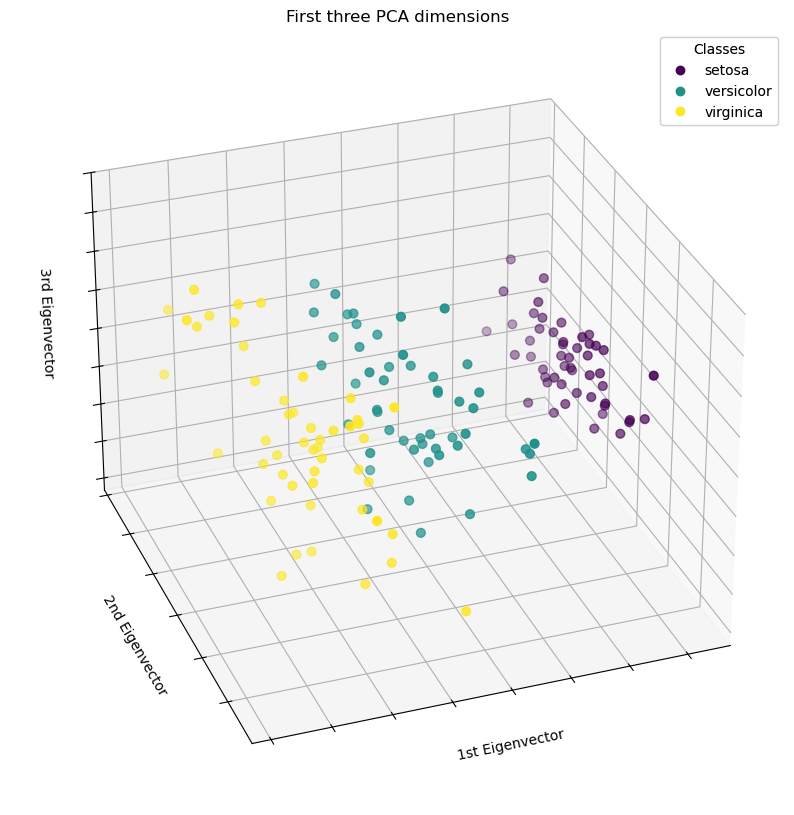

In [12]:
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(10, 15))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

legend1 = ax.legend(
    scatter.legend_elements()[0],
    iris.target_names.tolist(),
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

plt.show()

# Preparing for Training

Storing all the features or independent variables inside `X` and the target variable in `y`.

In [13]:
X = iris_data.drop('target', axis=1)
y = iris_data.target

In [14]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Splitting the dataset into 2 parts: 
- 70% for training
-  30% for testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training and Evaluation

Here, we are creating a `models` dictionary to store the different models as keys and their names as values.

In [16]:
models = {}

Now we are creating a function which will calculate the following for all of our trained models:
- Accuracy Score
- Precision Score
- F1 Score
- Recall Score
- Classification Report
- Confusion Matrix

In [17]:
def evaluate_model(model:str, models:dict) -> None:
    print(f"Evaluation of {models[model]}:\n")
    y_pred = model.predict(X_test)
    print(f"Accuracy Score- {accuracy_score(y_pred, y_test)}")
    print(f"Precision Score- {precision_score(y_test, y_pred, average=None)}")
    print(f"F1 Score- {f1_score(y_test, y_pred, average=None)}")
    print(f"Recall Score- {recall_score(y_test, y_pred, average=None)}")
    print(f"Classification Report-\n{classification_report(y_test, y_pred)}\n")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.YlGnBu)
    plt.title("Confusion Matrix")
    plt.show()

Initialiaze different algorithms, add to the `models` dictionary and train.

In [18]:
dt = DecisionTreeClassifier()
models[dt] = 'Decision Tree'
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
models[knn] = 'K Nearest Neighbor'
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
logr = LogisticRegression()
models[logr] = 'Logistic Regression'
logr.fit(X_train, y_train)

LogisticRegression()

In [21]:
ranf = RandomForestClassifier()
models[ranf] = 'Random Forest'
ranf.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
svc = SVC()
models[svc] = 'SVC'
svc.fit(X_train, y_train)

SVC()

In [23]:
gaus = GaussianNB()
models[gaus] = 'Gaussian NB'
gaus.fit(X_train, y_train)

GaussianNB()

In [24]:
mlpc = MLPClassifier()
models[mlpc] = 'MLP Classifier'
mlpc.fit(X_train, y_train)

C:\Users\rohan\anaconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

Start a loop to iterate through each model and evaluate its metrics.

Evaluation of Decision Tree:

Accuracy Score- 1.0
Precision Score- [1. 1. 1.]
F1 Score- [1. 1. 1.]
Recall Score- [1. 1. 1.]
Classification Report-
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45




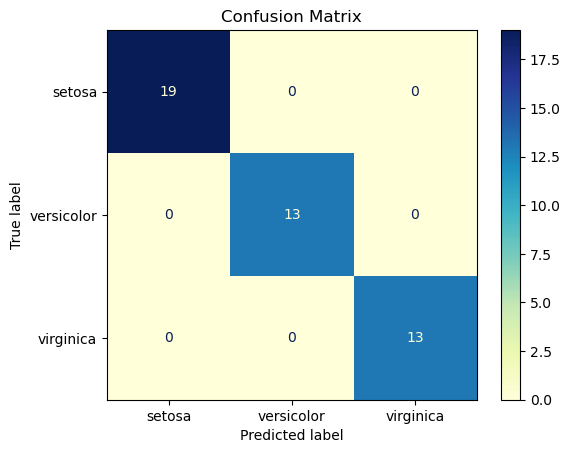

Evaluation of K Nearest Neighbor:

Accuracy Score- 1.0
Precision Score- [1. 1. 1.]
F1 Score- [1. 1. 1.]
Recall Score- [1. 1. 1.]
Classification Report-
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45




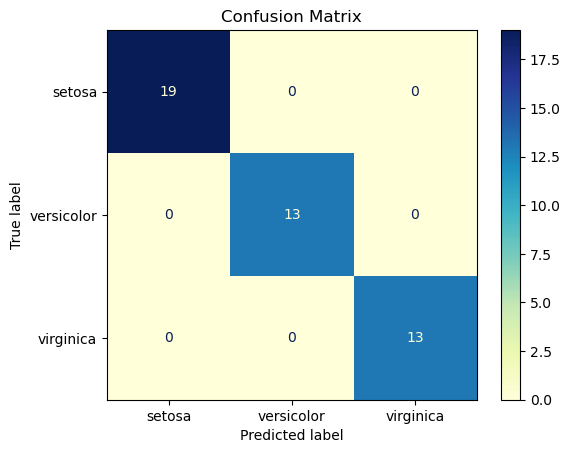

Evaluation of Logistic Regression:

Accuracy Score- 1.0
Precision Score- [1. 1. 1.]
F1 Score- [1. 1. 1.]
Recall Score- [1. 1. 1.]
Classification Report-
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45




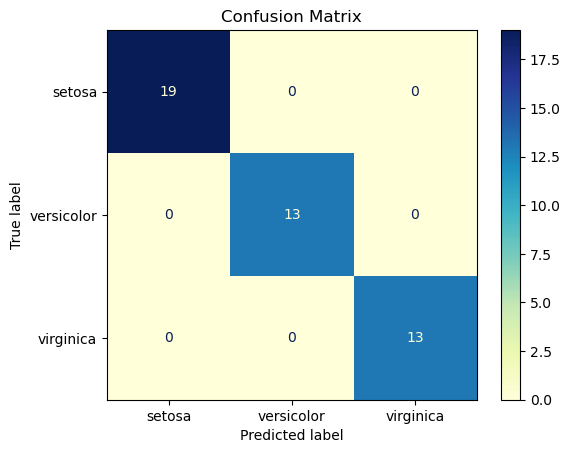

Evaluation of Random Forest:

Accuracy Score- 1.0
Precision Score- [1. 1. 1.]
F1 Score- [1. 1. 1.]
Recall Score- [1. 1. 1.]
Classification Report-
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45




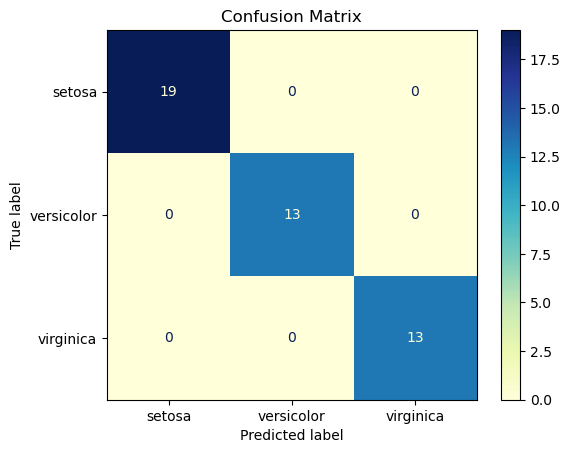

Evaluation of SVC:

Accuracy Score- 1.0
Precision Score- [1. 1. 1.]
F1 Score- [1. 1. 1.]
Recall Score- [1. 1. 1.]
Classification Report-
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45




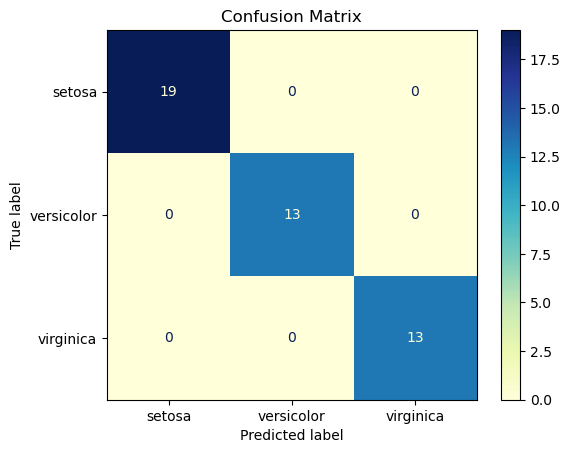

Evaluation of Gaussian NB:

Accuracy Score- 0.9777777777777777
Precision Score- [1.         1.         0.92857143]
F1 Score- [1.         0.96       0.96296296]
Recall Score- [1.         0.92307692 1.        ]
Classification Report-
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45




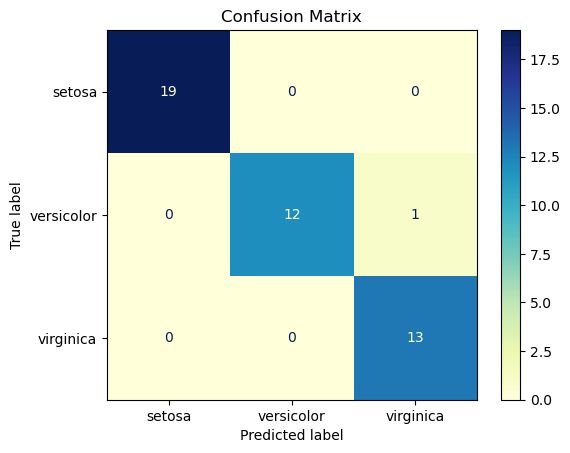

Evaluation of MLP Classifier:

Accuracy Score- 0.9777777777777777
Precision Score- [1.         1.         0.92857143]
F1 Score- [1.         0.96       0.96296296]
Recall Score- [1.         0.92307692 1.        ]
Classification Report-
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45




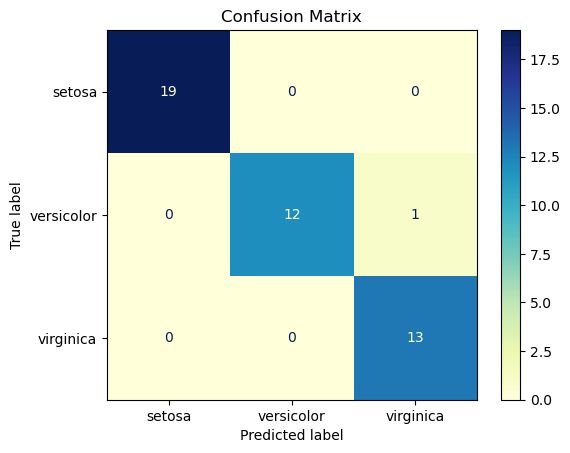

In [25]:
for i in models.keys():
    evaluate_model(i, models)